<a href="https://colab.research.google.com/github/faizulhz/datascience1/blob/master/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read the Data

In [71]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [72]:
df.shape

(918, 12)

In [73]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [74]:
df['HeartDisease'].unique()

array([0, 1])

#Seperate features and target variables as per requirement

In [75]:
#Features
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
#Labels
Y = df[['HeartDisease']]
X['Sex'] = X['Sex'].map({'M':0 , 'F':1})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
print(X['ChestPainType'].unique())
X['ChestPainType'] = X['ChestPainType'].map({'ATA':0 , 'NAP':1,'ASY':2,'TA':3})
print(X.head())

['ATA' 'NAP' 'ASY' 'TA']
   Age  Sex  ChestPainType  RestingBP  ...  MaxHR  ExerciseAngina Oldpeak  ST_Slope
0   40    0              0        140  ...    172               N     0.0        Up
1   49    1              1        160  ...    156               N     1.0      Flat
2   37    0              0        130  ...     98               N     0.0        Up
3   48    1              2        138  ...    108               Y     1.5      Flat
4   54    0              1        150  ...    122               N     0.0        Up

[5 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
print(X['RestingECG'].unique())
X['RestingECG'] = X['RestingECG'].map({'Normal':0 , 'ST':1,'LVH':2})

['Normal' 'ST' 'LVH']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
print(X.head())
print(X['ST_Slope'].unique())
X['ST_Slope'] = X['ST_Slope'].map({'Up':0 , 'Flat':1,'Down':2})
print(X.head())
print(X['ExerciseAngina'].unique())
X['ExerciseAngina'] = X['ExerciseAngina'].map({'N':0 , 'Y':1})

   Age  Sex  ChestPainType  RestingBP  ...  MaxHR  ExerciseAngina  Oldpeak  ST_Slope
0   40    0              0        140  ...    172               N      0.0        Up
1   49    1              1        160  ...    156               N      1.0      Flat
2   37    0              0        130  ...     98               N      0.0        Up
3   48    1              2        138  ...    108               Y      1.5      Flat
4   54    0              1        150  ...    122               N      0.0        Up

[5 rows x 11 columns]
['Up' 'Flat' 'Down']
   Age  Sex  ChestPainType  RestingBP  ...  MaxHR  ExerciseAngina  Oldpeak  ST_Slope
0   40    0              0        140  ...    172               N      0.0         0
1   49    1              1        160  ...    156               N      1.0         1
2   37    0              0        130  ...     98               N      0.0         0
3   48    1              2        138  ...    108               Y      1.5         1
4   54    0          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Split the data into training and testing sets

In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

In [80]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

print('#########################')

print(Y.shape)
print(ytrain.shape)
print(ytest.shape)

(918, 11)
(688, 11)
(230, 11)
#########################
(918, 1)
(688, 1)
(230, 1)


#Import the algorithm and define model for training

In [81]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=5)

In [82]:
ytrain.columns

Index(['HeartDisease'], dtype='object')

#Train Your Model

In [83]:
#fit function used for training or train a model
kmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

#Evaluate or validate or test your model

In [84]:
#predict function is used to predict the output
#Model performance on known data i.e training data

print((kmodel.predict(xtrain).reshape(-1,1) == ytrain).sum() / len(xtrain))
print(kmodel.score(xtrain,ytrain))


#Model performance on unknown data for the model

print((kmodel.predict(xtest).reshape(-1,1) == ytest).sum() / len(xtest))
print(kmodel.score(xtest,ytest))

HeartDisease    0.787791
dtype: float64
0.7877906976744186
HeartDisease    0.682609
dtype: float64
0.6826086956521739


#Make predictions for new input values

In [85]:
#iris flower - [[3.2,3.1,2.6,2.6]]
#print(kmodel.predict([[3.2,3.1,2.6,2.6]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

#5-fold Cross validation

In [87]:
training_acc = []
testing_acc = []

for i in range(10):
  xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

  kmodel.fit(xtrain,ytrain)

  training_acc.append(kmodel.score(xtrain,ytrain))
  testing_acc.append(kmodel.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [88]:
import numpy as np

print(np.array(training_acc).mean())
print(np.array(testing_acc).mean())

0.7854651162790698
0.7086956521739131


In [86]:
#print(kmodel.predict([[1.2,1.1,1.6,0.6]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

#Hyper Parameter Tuning - K

In [89]:
#Requirement - training and testing accuracy should be as close as possible
#if training accuracy >>>>>>>>> testing accuracy --- over fit model

tr_acc = []
ts_acc = []

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

for i in range(1,15):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(xtrain,ytrain)

  tr_acc.append(model.score(xtrain,ytrain))
  ts_acc.append(model.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [90]:
print(tr_acc)
print(ts_acc)

[1.0, 0.8343023255813954, 0.8197674418604651, 0.7936046511627907, 0.7994186046511628, 0.7790697674418605, 0.7718023255813954, 0.7543604651162791, 0.7688953488372093, 0.7543604651162791, 0.752906976744186, 0.7558139534883721, 0.751453488372093, 0.7398255813953488]
[0.6434782608695652, 0.6565217391304348, 0.6739130434782609, 0.6956521739130435, 0.7347826086956522, 0.7086956521739131, 0.7434782608695653, 0.7217391304347827, 0.7347826086956522, 0.7130434782608696, 0.7347826086956522, 0.7260869565217392, 0.717391304347826, 0.717391304347826]


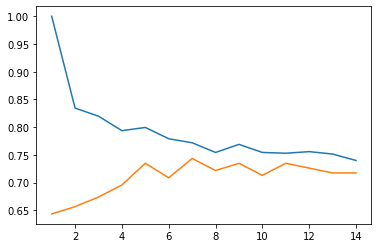

In [91]:
import matplotlib.pyplot as plt

plt.plot(range(1,15) , tr_acc)
plt.plot(range(1,15) , ts_acc)

plt.show()

In [ ]:
#We will go for new topic in next session as i am facing bad network today...

#Assignment : - https://www.kaggle.com/fedesoriano/heart-failure-prediction

#Use the heart failure data to make a model which can identify the possibility of heart desease and calculate the accuracy of the model as well